**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Samy Touabi<br/>
Student Number: 300184721

# Exploratory Analysis

## Import important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 200) # This makes the tables display across the entire cells

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [2]:
import pandas as pd

# URL to the raw CSV file on GitHub and Read into a DataFrame
ds1_glass = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/01/glass.csv")
ds2_dermatology = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/02/dermatology_database_1.csv")
ds3_maternal = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv")
ds4_car = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/04/car.data", header=None)
# LINK FOR CAR ATTRIBUTES: https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/04/car.c45-names
ds5_wine = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/05/WineQT.csv")
ds6_personalities = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/06/16P.csv", encoding='latin1')
ds7_credit_test = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/test.csv")
ds7_credit_train = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/train.csv")

#PRINT SAMPLES OF EACH DATASET
# print("1. First few rows of GLASS dataset:")
# print(ds1_glass.head(), "\n")

# print("2. First few rows of DERMATOLOGY dataset:")
# print(ds2_dermatology.head(), "\n")

# print("3. First few rows of MATERNAL dataset:")
# print(ds3_maternal.head(), "\n")

# print("4. First few rows of CARS dataset:")
# print(ds4_car.head(), "\n")

# print("5. First few rows of WINE dataset:")
# print(ds5_wine.head(), "\n")

# print("6. First few rows of PERSONALITIES dataset:")
# print(ds6_personalities.head(), "\n")

# print("7. First few rows of CREDIT TEST dataset:")
# print(ds7_credit_test.head(), "\n")

# print("7. First few rows of CREDIT TRAIN dataset:")
# print(ds7_credit_train.head(), "\n")

<ipython-input-2-3f0bf9fe09a7>:12: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  ds7_credit_train = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/train.csv")


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess missing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? Specifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the corresponding code.

    1.3 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

**1.1 In the list of options, what are the datasets that contain missing values? Specifically, which attribute or attributes has missing values?**

Datasets 02 and 07 have missing values.

In the 02 dataset (Dermatology), there are 8 missing values for the age attribute, replaced by a question mark, '?'.


```
Checking missing values in Dermatology dataset:


'?' as missing values:
age    8
dtype: int64
```



In the 07 datasets (Credit Score *test* and *train*), there are thousands of missing values for the following attributes, replaced by a NaN value or '_______'




```
Checking missing values in Credit Train dataset:

NaN values detected (including empty strings):
Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200

'_______' as missing values:
Occupation    7062
----------------------------------------
Checking missing values in Credit Test dataset:

NaN values detected (including empty strings):
Name                       5015
Monthly_Inhand_Salary      7498
Type_of_Loan               5704
Num_of_Delayed_Payment     3498
Num_Credit_Inquiries       1035
Credit_History_Age         4470
Amount_invested_monthly    2271
Monthly_Balance             562

'_______' as missing values:
Occupation    3438
```


**1.2 Describe the methodology used for this investigation, and provide the corresponding code.**

1. **Dataset Organization**: I maintain a list of datasets paired with their names for systematic checks.

2. **Missing Value Symbols**: I establish a predefined list of symbols (e.g., `"?"`, `"_______"` that I found manually while skimming the datasets) to identify erroneous values.

3. **Function Creation**: I implement a function, `check_missing_values`, to detect missing values across datasets, enhancing code reusability.

4. **NaN Detection**: Within the function, I check for `NaN` values using `isna()`, capturing empty strings as well.

5. **Symbol Checks**: I use `applymap()` to count occurrences of specified missing value symbols in the datasets.

6. **Results Output**: I print the findings clearly, indicating the presence of NaN values and specific symbols.

7. **Iterative Processing**: I apply the function to each dataset to ensure comprehensive evaluation.


In [3]:
# Your code goes here
import pandas as pd

# List of datasets and names
datasets = [ds1_glass, ds2_dermatology, ds3_maternal, ds4_car, ds5_wine, ds6_personalities, ds7_credit_train, ds7_credit_test]
dataset_names = ["Glass", "Dermatology", "Maternal Health Risk", "Car", "Wine", "Personalities", "Credit Train", "Credit Test"]

# List of missing value symbols to check for
missing_symbols = ["?", "_______"]

# Function to check for missing values and only print if they exist
def check_missing_values(dataset, name):
    print(f"Checking missing values in {name} dataset:\n")

    # Check for NaN values (including empty strings)
    nan_count = dataset.isna().sum()
    if nan_count.any():
        print("NaN values detected (including empty strings):")
        print(nan_count[nan_count > 0])

    # Check for specific missing value symbols
    for symbol in missing_symbols:
        # symbol_count = (dataset == symbol).sum()
        symbol_count = (dataset.applymap(lambda x: x == symbol)).sum()
        if symbol_count.any():
            print(f"\n'{symbol}' as missing values:")
            print(symbol_count[symbol_count > 0])

    print("-" * 40)

# Check missing values for each dataset
for ds, name in zip(datasets, dataset_names):
    check_missing_values(ds, name)

<ipython-input-3-6f8c21a64246>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  symbol_count = (dataset.applymap(lambda x: x == symbol)).sum()


Checking missing values in Glass dataset:

----------------------------------------
Checking missing values in Dermatology dataset:


'?' as missing values:
age    8
dtype: int64
----------------------------------------
Checking missing values in Maternal Health Risk dataset:

----------------------------------------
Checking missing values in Car dataset:

----------------------------------------
Checking missing values in Wine dataset:

----------------------------------------
Checking missing values in Personalities dataset:

----------------------------------------
Checking missing values in Credit Train dataset:

NaN values detected (including empty strings):
Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

'_______' as missing values:
Occupation    7062
d

**1.3 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.**

There are a lot of imputation strategies to mitigate the impact of corrupt data. For numerical attributes, we can replace the erroneous entries with the mean, median or **mode** of the rest of the data. As for categorical attribues, we can replace them by generic names such as "John Doe" or "Unavailable".

In [4]:
import pandas as pd
import numpy as np

# Load the Dermatology dataset
ds2_dermatology = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/02/dermatology_database_1.csv")

# Convert the 'age' column to numeric, setting errors='coerce' to handle the '?' as NaN
ds2_dermatology['age'] = pd.to_numeric(ds2_dermatology['age'], errors='coerce')

# Calculate the median age, rounding up if necessary
median_age = int(np.ceil(ds2_dermatology['age'].median()))

# Replace NaN values (originally '?') in 'age' column with the calculated median
ds2_dermatology['age'].fillna(median_age, inplace=True)

# Check the result
print(ds2_dermatology['age'].head())

############################################################################
# Check if there are any more errors in the Dermatology dataset
datasets = [ds2_dermatology]
dataset_names = ["Dermatology"]

# Function to check for missing values and only print if they exist
def check_missing_values(dataset, name):
    print(f"\nChecking missing values in {name} dataset:\n")

    # Check for NaN values (including empty strings)
    nan_count = dataset.isna().sum()
    if nan_count.any():
        print("NaN values detected (including empty strings):")
        print(nan_count[nan_count > 0])
    else:
        print("No NaN values found.")

# Check missing values for each dataset
for ds, name in zip(datasets, dataset_names):
    check_missing_values(ds, name)


0    55.0
1     8.0
2    26.0
3    40.0
4    45.0
Name: age, dtype: float64

Checking missing values in Dermatology dataset:

No NaN values found.


2. **Select and familiarize yourself with a classification task:** Choose one of the provided datasets for further investigation. It is advisable to select a dataset containing a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific application? Do you possess expertise in this particular domain of application?


**2.1 What is the objective of the task? Is it intended for a specific appplication? Do you possess expertise in this particular domain of application?**

The task I have chosen is the **Maternal Heath Risk** dataset. Since it contains 1014 entries (rows), it will be sufficient to ensure best results when applying ML algorithms.

The objective of this classification task is to predict the **RiskLevel** of mothers based on health metrics such as age, blood pressure, blood sugar, body temperature, and heart rate. This analysis can be valuable for healthcare applications, helping to identify individuals at high risk for maternal health issues. While I do not have specific expertise in this domain, I am quite interested in exploring it some more.

3. **Attribute Analysis**:

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

**3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.**

Neither heart rate nor body tempeature attributes seem to be particularly important, as all heart rates and body temperatures for the women present in the dataset are nearly identical (with a small and likely insignificant differences amonst them).

**3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.**

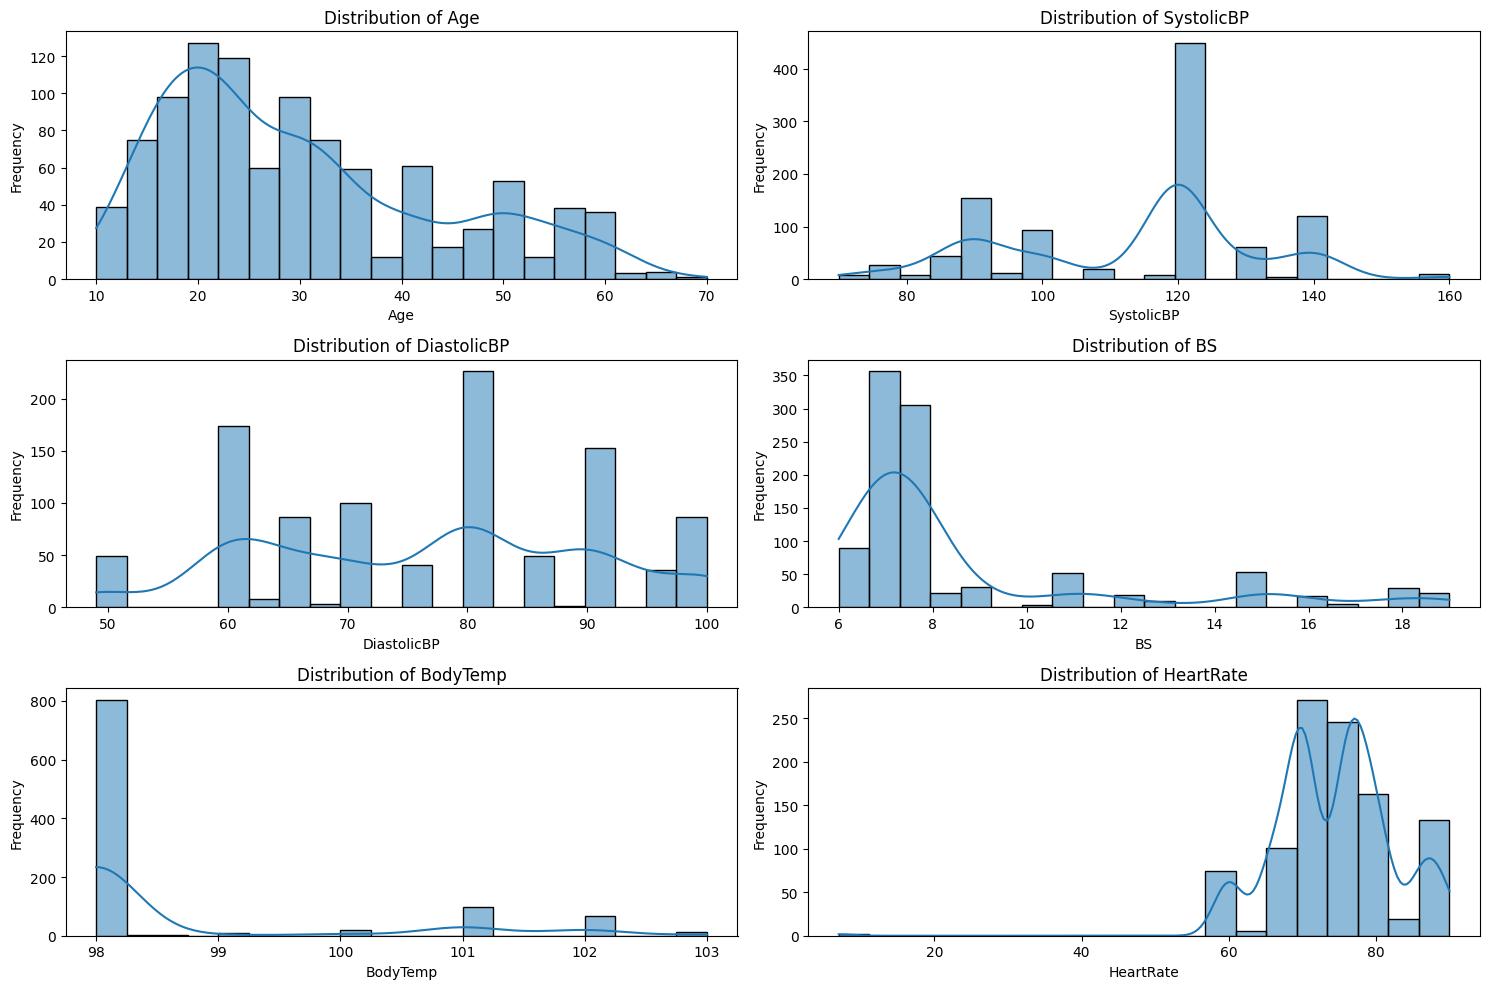

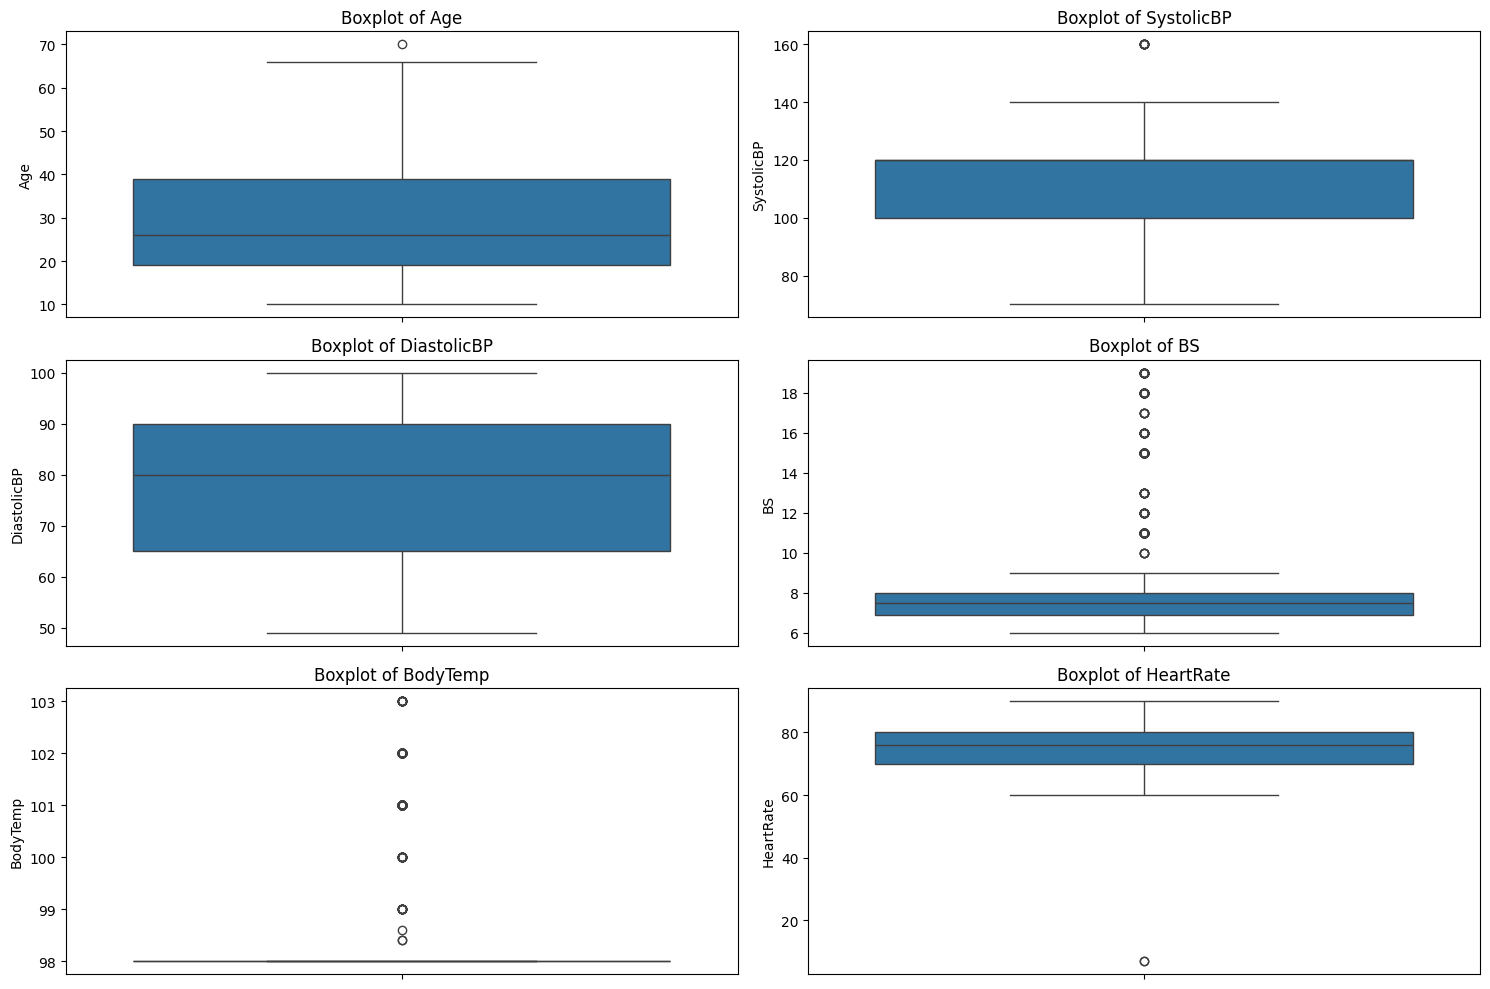

In [5]:
# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = ds3_maternal

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Create histograms for numerical attributes
for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 2, i + 1)  # Adjust subplot grid as needed
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create boxplots for numerical attributes to identify outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

**4. Class Distribution Analysis: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.**

Based on the class balance output:

- **Low risk**: 40.04%
- **Mid risk**: 33.14%
- **High risk**: 26.82%

The dataset is **somewhat imbalanced**, though not severely so. The classes are not perfectly equally distributed, but there isn't a drastic difference between the proportions. A perfectly balanced dataset would have close to 33.33% for each class, and in this case, the difference between the largest and smallest class (low risk vs. high risk) is about 13%.

### Key Points:
- The **low risk** class has the highest representation.
- The **high risk** class has the lowest representation.
- The imbalance is moderate, and most machine learning algorithms canprobably  still handle this level of imbalance. If I want, I can go ahead and consider techniques like class weighting to ensure robust model performance, especially for the **high risk** category.

If the imbalance becomes more problematic in practice (e.g., leading to poor predictive performance on the minority class), techniques like **cost-sensitive learning** can be explored.

<ipython-input-6-c0ec01944f8c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


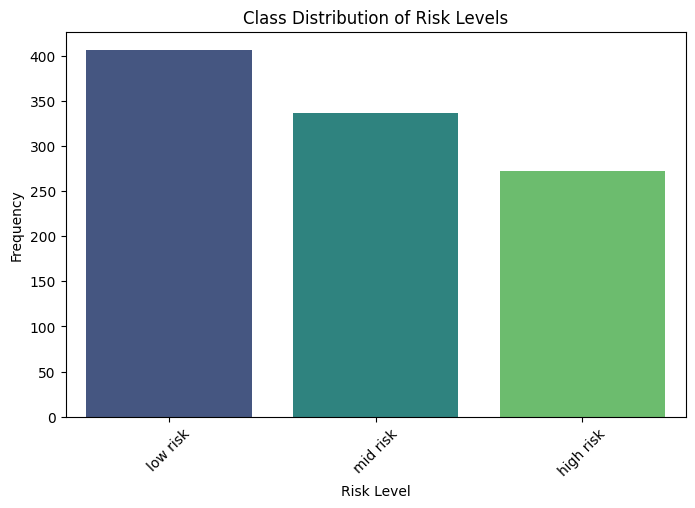

Class Balance (%):
RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: count, dtype: float64


In [6]:
# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = ds3_maternal

# Count the occurrences of each class label
class_distribution = data['RiskLevel'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Check for class balance
total_instances = len(data)
class_balance = class_distribution / total_instances * 100
print("Class Balance (%):")
print(class_balance)

5. **Preprocessing**:

    5.1 For numerical features, determine the best transformation to use. Indicate the transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before and after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). If your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

**5.1 For numerical features, determine the best transformation to use. Indicate the transformation that seems appropriate and why. Include the code illustrating how apply the transformation. For at least one attribute, show the distribution before and after the transformation. See Preprocessing data.**

*Note: the before and after distribution for SystolicBP is shown below*

For the **Maternal Health Risk** dataset, the best transformations depend on the distribution and nature of the remaining numerical attributes. Here's a breakdown of suitable transformations for each RELEVANT attribute:

### 1. **Age**:
   - **Recommended Transformation**: **Standardization**.
   - **Reason**: Age is generally normally distributed across populations, so standardization (mean = 0, std dev = 1) helps handle variations across individuals.
   - **Code**:
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   data['Standardized_Age'] = scaler.fit_transform(data[['Age']])
   ```

### 2. **SystolicBP**:
   - **Recommended Transformation**: **Log Transformation**.
   - **Reason**: Blood pressure measurements tend to have a skewed distribution (higher frequency at lower values, but some high outliers). A log transformation helps reduce skewness.
   - **Code**:
   ```python
   data['Log_SystolicBP'] = np.log(data['SystolicBP'] + 1)  # Add 1 to avoid log(0)
   ```

### 3. **DiastolicBP**:
   - **Recommended Transformation**: **Standardization**.
   - **Reason**: Like systolic BP, diastolic BP values may not be too skewed, but standardization helps normalize variations.
   - **Code**:
   ```python
   data['Standardized_DiastolicBP'] = scaler.fit_transform(data[['DiastolicBP']])
   ```

### 4. **Blood Sugar (BS)**:
   - **Recommended Transformation**: **Log Transformation**.
   - **Reason**: Blood sugar levels can have high variability and positive skewness, so a log transformation can reduce the effect of outliers.
   - **Code**:
   ```python
   data['Log_BS'] = np.log(data['BS'] + 1)
   ```

### Summary:
- **Log Transformation** for **SystolicBP** and **BS** (to reduce skewness).
- **Standardization** for **Age** and **DiastolicBP** (for normalization and handling variations).

### Why these transformations?
- Log transformations are great for skewed data with high variance, as they compress larger values.
- Standardization is essential for features where relative scale matters or where the data needs to fit a normal distribution, which improves performance in many algorithms.

This combination should improve the overall performance of machine learning models by addressing scale differences and data distribution issues.

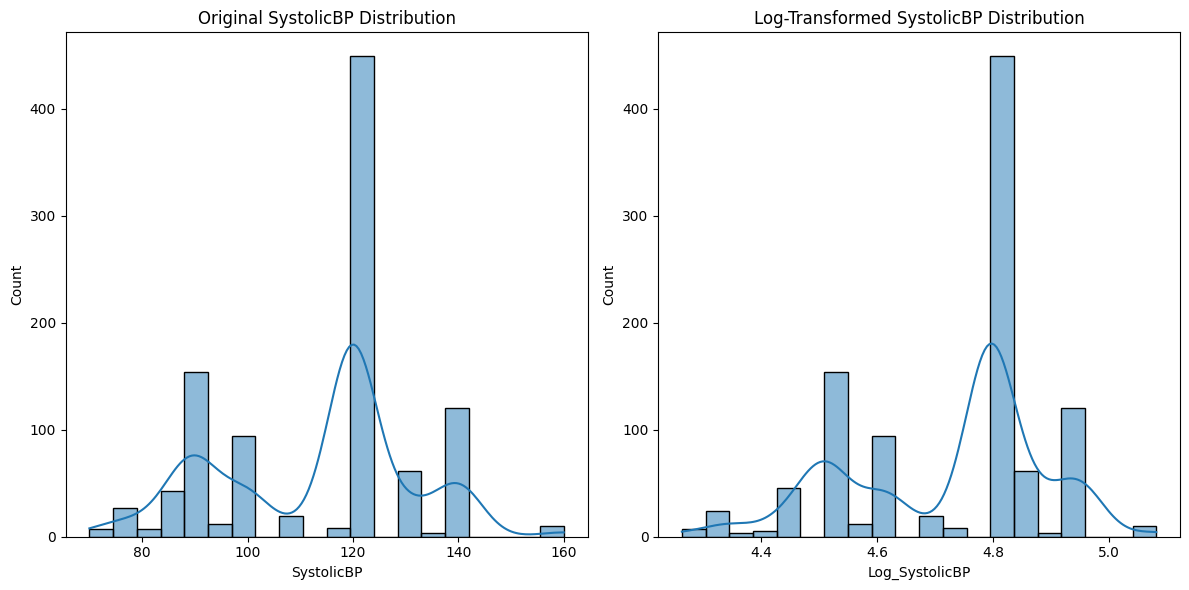

In [7]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
data = ds3_maternal

# Visualize the original distribution of 'SystolicBP'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['SystolicBP'], bins=20, kde=True)
plt.title('Original SystolicBP Distribution')

# Apply log transformation to 'SystolicBP' (shift values by +1 to avoid log(0) errors)
data['Log_SystolicBP'] = np.log(data['SystolicBP'] + 1)

# Visualize the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(data['Log_SystolicBP'], bins=20, kde=True)
plt.title('Log-Transformed SystolicBP Distribution')

plt.tight_layout()
plt.show()

# Apply other transformations to other attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Standardized_Age'] = scaler.fit_transform(data[['Age']])
data['Standardized_DiastolicBP'] = scaler.fit_transform(data[['DiastolicBP']])
data['Log_BS'] = np.log(data['BS'] + 1)

# Other scalers for future reference:
# scaler = StandardScaler()
# data['Standardized_SystolicBP'] = scaler.fit_transform(data[['SystolicBP']])

# min_max_scaler = MinMaxScaler()
# data['Scaled_SystolicBP'] = min_max_scaler.fit_transform(data[['SystolicBP']])


**5.2 For categorical features, show how to apply one-hot encoding. If your dataset does not have categorical data, show how to apply the one-hot encoder to the label (target variable).**
### Step 1: Identify Categorical Features
In the **Maternal Health Risk** dataset, the categorical feature is the **target variable**, `RiskLevel`, which contains values like:
- `low risk`
- `mid risk`
- `high risk`

Since the other features in the dataset are numerical, we can apply one-hot encoding to this **target variable**.

### Step 2: Apply One-Hot Encoding Using `OneHotEncoder`
To one-hot encode the `RiskLevel` column, we can use `OneHotEncoder` from `sklearn.preprocessing`. This will transform each category into a new binary column. The code to do so is below


### Step 3: Explanation
- **`OneHotEncoder`**: This encodes the `RiskLevel` column into three separate binary columns: `RiskLevel_high risk`, `RiskLevel_low risk`, and `RiskLevel_mid risk`.
- **`fit_transform()`**: This method converts the categorical data into one-hot encoded format.
- **`sparse=False`**: This ensures that the output is a dense matrix (i.e., a regular DataFrame) rather than a sparse one.

### Example Output
After running the code, the head of the DataFrame will look like this:

| Age | SystolicBP | DiastolicBP | BS  | RiskLevel_high risk | RiskLevel_low risk | RiskLevel_mid risk |
|-----|------------|-------------|-----|---------------------|--------------------|--------------------|
| 25  | 130        | 80          | 15  | 1                   | 0                  | 0                  |
| 35  | 140        | 90          | 13  | 1                   | 0                  | 0                  |
| 29  | 90         | 70          | 8   | 1                   | 0                  | 0                  |
| 30  | 140        | 85          | 7   | 1                   | 0                  | 0                  |

### Step 4: Code Explanation
- **`fit_transform()`**: Fits the encoder to the `RiskLevel` column and transforms it into binary columns for each category.
- **`get_feature_names_out()`**: Returns the column names after encoding, prefixed with the original column name (`RiskLevel`).
- **`pd.concat()`**: Concatenates the one-hot encoded columns with the original dataset.
- **`drop()`**: Removes the original categorical column, as it has been replaced by the one-hot encoded columns.

### Conclusion
Since the dataset only has the target variable (`RiskLevel`) as categorical, this one-hot encoding process is useful to transform it into a format that machine learning algorithms can handle.

In [8]:
# Your code goes here
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# Create a sample dataframe (assuming data is already loaded)
data = ds3_maternal

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse=False to return a dense array

# Reshape and fit-transform the RiskLevel feature
risk_encoded = encoder.fit_transform(data[['RiskLevel']])

# Convert the encoded data to a DataFrame
encoded_columns = encoder.get_feature_names_out(['RiskLevel'])  # Column names for one-hot encoded categories
risk_encoded_df = pd.DataFrame(risk_encoded, columns=encoded_columns)

# Concatenate the original data with the one-hot encoded columns
data_with_encoding = pd.concat([data, risk_encoded_df], axis=1)

# Drop the original 'RiskLevel' column
data_with_encoding.drop('RiskLevel', axis=1, inplace=True)

# View the transformed data
print(data_with_encoding)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  Log_SystolicBP  Standardized_Age  Standardized_DiastolicBP    Log_BS  RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk
0      25         130           80  15.0      98.0         86        4.875197         -0.361738                  0.255023  2.772589                  1.0                 0.0                 0.0
1      35         140           90  13.0      98.0         70        4.948760          0.380777                  0.975539  2.639057                  1.0                 0.0                 0.0
2      29          90           70   8.0     100.0         80        4.510860         -0.064732                 -0.465493  2.197225                  1.0                 0.0                 0.0
3      30         140           85   7.0      98.0         70        4.948760          0.009519                  0.615281  2.079442                  1.0                 0.0                 0.0
4      35         120           60 

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.



In [9]:
# Import necessary libraries
import pandas as pd

# Set the target class X and y

X = data_with_encoding[['Standardized_Age', 'Log_SystolicBP', 'Standardized_DiastolicBP', 'Log_BS']]
y = data_with_encoding[['RiskLevel_high risk', 'RiskLevel_mid risk', 'RiskLevel_low risk']]

# Check X and y to confirm
print("Training Data (X):")
print(X.head())  # View training data
print("\nTarget Class (y):")
print(y.head())  # View target class


Training Data (X):
   Standardized_Age  Log_SystolicBP  Standardized_DiastolicBP    Log_BS
0         -0.361738        4.875197                  0.255023  2.772589
1          0.380777        4.948760                  0.975539  2.639057
2         -0.064732        4.510860                 -0.465493  2.197225
3          0.009519        4.948760                  0.615281  2.079442
4          0.380777        4.795791                 -1.186009  1.960095

Target Class (y):
   RiskLevel_high risk  RiskLevel_mid risk  RiskLevel_low risk
0                  1.0                 0.0                 0.0
1                  1.0                 0.0                 0.0
2                  1.0                 0.0                 0.0
3                  1.0                 0.0                 0.0
4                  0.0                 0.0                 1.0


7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [10]:
# Your code goes here
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training data shape (X_train): (811, 4)
Testing data shape (X_test): (203, 4)
Training target shape (y_train): (811, 3)
Testing target shape (y_test): (203, 3)


--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).


1.   *6.3. Preprocessing data*. Scikit Learn. https://scikit-learn.org/stable/modules/preprocessing.html. Accessed September 24th 2024
2.   *OneHotEncoder*. Scikit Learn. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html. Accessed September 24th 2024
3.   *Stack Overflow*. https://stackoverflow.com/questions/75440987/how-to-increase-google-colab-cell-output-width. Accessed September 24th 2024
4.   *W3 Schools*. https://www.w3schools.com/python/pandas/pandas_intro.asp. Accessed September 24th 2024





## AI transcript

1.   https://chatgpt.com/share/66f37d89-cd04-8013-a628-b06851f7fa8a
2.   https://chatgpt.com/share/66f37dba-9124-8013-8f7c-9f3e7469e8ea

**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".